In [42]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
import pickle


In [43]:
data = pd.read_csv('/content/training_dataset.csv')

In [34]:
data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Label
0,58:50.7,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
1,58:50.3,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
2,58:49.9,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
3,58:49.5,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
4,58:49.1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536133,18:56.6,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
536134,18:56.2,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
536135,18:55.8,25,8,0,10,9,2.556642,6,6,7,3.333333,2,192,12,1,0
536136,18:55.4,25,8,0,10,9,2.556642,6,6,7,3.333333,2,192,12,1,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536138 entries, 0 to 536137
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         536138 non-null  object 
 1   FQDN_count        536138 non-null  int64  
 2   subdomain_length  536138 non-null  int64  
 3   upper             536138 non-null  int64  
 4   lower             536138 non-null  int64  
 5   numeric           536138 non-null  int64  
 6   entropy           536138 non-null  float64
 7   special           536138 non-null  int64  
 8   labels            536138 non-null  int64  
 9   labels_max        536138 non-null  int64  
 10  labels_average    536138 non-null  float64
 11  longest_word      536124 non-null  object 
 12  sld               536138 non-null  object 
 13  len               536138 non-null  int64  
 14  subdomain         536138 non-null  int64  
 15  Label             536138 non-null  int64  
dtypes: float64(2), int64

# Data Preprocessing

In [44]:
#drop timestamp column
data=data.drop(columns=['timestamp'])  
le = LabelEncoder()
for column in data.columns:
    data['longest_word'] = le.fit_transform(data['longest_word'])
for column in data.columns:
    data['sld'] = le.fit_transform(data['sld'])

In [45]:
y = data['Label']
x=data.loc[:, data.columns != 'Label'] 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
 x, y, test_size=0.28, random_state=42)

# RandomForestClassifier model

In [39]:
clf = RandomForestClassifier(random_state=0 ,n_estimators=250 ,max_depth=26,bootstrap='true')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy for RandomForestClassifier is :',accuracy*100)
f1_score = f1_score(y_test, y_pred)
print('f1_score for RandomForestClassifier is :' ,f1_score )

Accuracy for RandomForestClassifier is : 82.25341229291429
f1_score for RandomForestClassifier is : 0.8611818897104417


In [40]:
print("Classification report for RandomForestClassifier :\n", classification_report(y_test, y_pred))

Classification report for RandomForestClassifier :
               precision    recall  f1-score   support

           0       1.00      0.61      0.75     67472
           1       0.76      1.00      0.86     82647

    accuracy                           0.82    150119
   macro avg       0.88      0.80      0.81    150119
weighted avg       0.87      0.82      0.81    150119



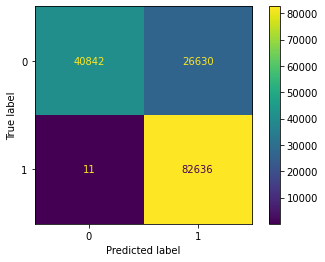

In [10]:
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf,X_test,y_test)

# LogisticRegression classifier

In [47]:
LR_clf = LogisticRegression(max_iter=1000)
LR_clf.fit(X_train,y_train)
y_pred_LR= LR_clf.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print('Accuracy is :',accuracy_LR*100)
f1_score_LR= f1_score(y_test, y_pred_LR)
print('f1_score is :' ,f1_score_LR )

Accuracy is : 82.05889993938142
f1_score is : 0.8593672492206794


In [48]:
print("Classification report for LogisticRegression :\n", classification_report(y_test, y_pred_LR))

Classification report for LogisticRegression :
               precision    recall  f1-score   support

           0       0.99      0.61      0.75     67472
           1       0.76      1.00      0.86     82647

    accuracy                           0.82    150119
   macro avg       0.87      0.80      0.81    150119
weighted avg       0.86      0.82      0.81    150119



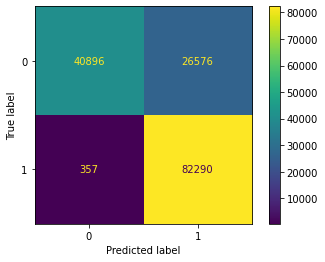

In [18]:
confusion_matrix(y_test, y_pred_LR)
plot_confusion_matrix(LR_clf,X_test,y_test)

# AdaBoostClassifier

In [ ]:
#grid searcg to know the best parameters
model = AdaBoostClassifier()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
grid_result = grid_search.fit(x, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.820598 using {'learning_rate': 1.0, 'n_estimators': 500}


In [29]:
clf2 = AdaBoostClassifier(random_state=0,learning_rate= 1.0, n_estimators= 500)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
#print(y_pred)
accuracy2 = accuracy_score(y_test, y_pred2)
print('Accuracy for AdaBoostClassifier is :',accuracy2*100)
f1_sc2 = f1_score(y_test,y_pred2)
print('f1_score for AdaBoostClassifier is :' ,f1_sc2 )

Accuracy for AdaBoostClassifier is : 82.18280164402907
f1_score for AdaBoostClassifier is : 0.860553988603246


In [30]:
print("Classification report for AdaBoostClassifier :\n", classification_report(y_test, y_pred2))

Classification report for AdaBoostClassifier :
               precision    recall  f1-score   support

           0       1.00      0.61      0.75     67472
           1       0.76      1.00      0.86     82647

    accuracy                           0.82    150119
   macro avg       0.88      0.80      0.81    150119
weighted avg       0.86      0.82      0.81    150119



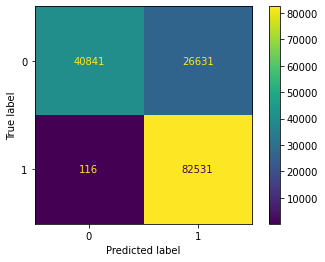

In [31]:
confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(clf2,X_test,y_test)